# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  25 баллов
* Задача 5 &mdash; 25 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 6 &mdash; 35 баллов
* Задача 7 &mdash; 40 баллов


-----

In [11]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import typing as tp

sns.set(palette = 'Set2')

### <b><i><font color="blue">Легкая часть</font></i></b> 
### Задача 1

Для критерия Вальда для проверки гипотез с $\mathsf{H}_0: \theta = \theta_0$ найдите мощность критерия, а также эквивалентный доверительный интервал для
- двустронней альтернативы (мощность была выведена на лекции)
- левосторонней альтернативы
- правосторонней альтернативы

### Задача 2
 Пусть $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P} \in \{ \mathsf{P}_{\theta} | \theta \in \Theta \}$
и для проверки гипотез $\mathsf{H}_0 \colon \theta \in [−1, 1]$   vs.  $\mathsf{H}_1 \colon \theta \notin [−1, 1]$ используется критерий
$S = \{x \in \mathbb{R}^n | T(x) > 1\}$. Предположим, $T(x)$ имеет распределение $\mathcal{N}(\theta, 1)$. Какие
ответы возможны в результате проверки данных гипотез и в каких случаях? Найдите
вероятность ошибки первого рода.

*Указание:*
- Не забудьте, что в определении вероятности ошибки I рода стоит супремум по всем параметрам из основной гипотезы
- Можно показать, где достигается супремум графически. Например, с помощью `sps.norm`, где параметр `loc` отвечает за сдвиг.


### Задача 3

Проведен эксперимент, получены данные из экспоненциального распределения. 

In [125]:
sample = np.array([0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
                   0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252,
                   0.00519983, 0.87588937, 0.44660739, 0.05967191, 0.05016975,
                   0.05065286, 0.09068843, 0.18598196, 0.14138427, 0.08605575,
                   0.23659272, 0.03755863, 0.08637888, 0.1140693 , 0.15223367,
                   0.384484  , 0.05568397, 0.18050729, 0.22437618, 0.01189096])

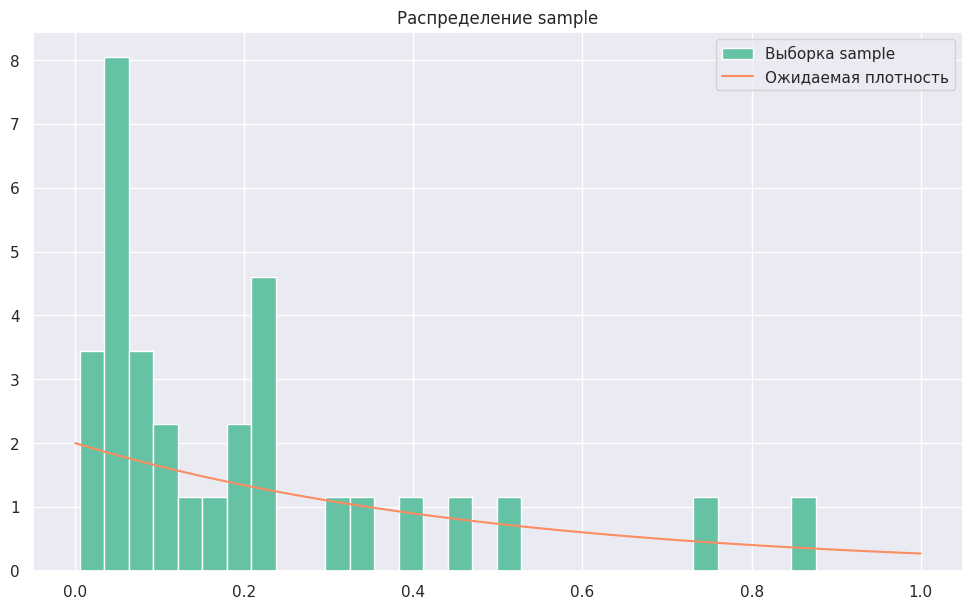

In [126]:
xLine = np.linspace(0, 1, 100)
assumption = sps.expon(scale = 1 / 2).pdf(xLine)
plt.figure(figsize = (12, 7), dpi = 100)


plt.hist(sample, density = True, bins = len(sample), label = 'Выборка sample')
plt.plot(xLine, assumption, label = 'Ожидаемая плотность')
plt.title("Распределение sample")
plt.legend();

Необходимо проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

$X_1, ... X_n$ - выборка из распределения $Exp(\theta)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \theta = 2$ c правосторонней и левосторонней альтернативами.

1. Оформите функцию подсчета статистики критерия, p-value и доверительного интервала 

In [127]:
def count_wald_statistic(n, estimation_theta, estimation_sigma, theta):
    if estimation_sigma > 1e-18:
        return np.sqrt(n) * (estimation_theta - theta) / estimation_sigma
    return np.inf

def wald_two_sided_alternative(sample, theta, estimation_theta, estimation_sigma):
    alpha, n = 0.05, len(sample)
    z = sps.norm.ppf(1 - alpha / 2)
    statistic = count_wald_statistic(n, estimation_theta, estimation_sigma, theta)
    p_value = 2 * sps.norm.sf(np.abs(statistic))
    left = estimation_theta - estimation_sigma * z / np.sqrt(n) 
    right = estimation_theta + estimation_sigma * z / np.sqrt(n)
    result = {'p_value': p_value, 
              'left': left, 
              'right': right, 
              'statistic': statistic,
              'critical_value': z,
              'H0': not (np.abs(statistic) > z)}
    return result

def wald_greater_alternative(sample, theta, estimation_theta, estimation_sigma):
    alpha, n = 0.05, len(sample)
    z = sps.norm.ppf(1 - alpha)
    statistic = count_wald_statistic(n, estimation_theta, estimation_sigma, theta)
    p_value = sps.norm.sf(statistic)
    left = estimation_theta - z * estimation_sigma / np.sqrt(n)
    right = np.inf
    result = {'p_value': p_value, 
              'left': left, 
              'right': right, 
              'statistic': statistic,
              'critical_value': z,
              'H0': statistic <= z}
    return result
    
def wald_less_alternative(sample, theta, estimation_theta, estimation_sigma):
    alpha, n = 0.05, len(sample)
    z = sps.norm.ppf(alpha)
    statistic = count_wald_statistic(n, estimation_theta, estimation_sigma, theta)
    p_value = sps.norm.cdf(statistic)
    right = estimation_theta - z * estimation_sigma / np.sqrt(n)
    left = -np.inf
    result = {'p_value': p_value, 
              'left': left, 
              'right': right, 
              'statistic': statistic,
              'critical_value': z,
              'H0': statistic >= z}
    return result

def wald_test(sample, 
              theta, 
              estimation_theta, 
              estimation_sigma, 
              alternative = 'two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma
    param alternative: вид альтернативной гипотезы, может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    return conf_int - доверительный интервал
    """
    if alternative == 'two_sided':
        return wald_two_sided_alternative(sample, theta, estimation_theta, estimation_sigma)
    if alternative == 'less':
        return wald_less_alternative(sample, theta, estimation_theta, estimation_sigma)
    if alternative == 'greater':
        return wald_greater_alternative(sample, theta, estimation_theta, estimation_sigma)
    
    
    

2. Проверьте гипотезу с правосторонней альтернативой.

In [128]:
estimation_theta = 1 / np.mean(sample)
estimation_sigma = 1 / np.mean(sample)
result = wald_test(sample, 
                   2, 
                   estimation_theta, 
                   estimation_sigma, 
                   alternative = 'greater')
pd.DataFrame(result, index = [0]).round(4)

,p_value,left,right,statistic,critical_value,H0
0,0.0005,3.4733,inf,3.2705,1.6449,False


**Вывод:**

Гипотеза $H_{0}$ отвергается. <<Степень отвержения>> можно оценить используя $p-value$, значение которого оказалось на два порядка меньше ассимптотического уровня значимости $\alpha$.


3. Проверьте гипотезу с левосторонней альтернативой.

In [129]:
estimation_theta = 1 / np.mean(sample)
estimation_sigma = 1 / np.mean(sample)
result = wald_test(sample, 
                   2, 
                   estimation_theta, 
                   estimation_sigma, 
                   alternative = 'less')
pd.DataFrame(result, index = [0]).round(4)

,p_value,left,right,statistic,critical_value,H0
0,0.9995,-inf,6.4547,3.2705,-1.6449,True


**Вывод:** Гипотеза $H_{0}$ не отвергается

**Итог:**

По двум экспериментам можем сделать вывод о том, что истинное значение $\theta$ больше двух. Так как за статистически значимый результат принимается тот, в котором статистика является отвергнутой.

При этом малое значение $p - value$ сообщает об уверенном отвержении гипотезы



### Задача 4

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем не редко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода или *реального уровня значимости* при конечной выборке.

Зачастую посчитать точное значение реального уровня значимости довольно сложно, поэтому вместо него вычисляют оценку с помощью семплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки реального уровня** значимости критерия $S$ методом Монте-Карло.

**Ответ:**

Реальный уровень значимости находится по формуле:
$$
\operatorname{P}(I_{s}) = \operatorname{E}_{\theta_{0}} I(X \in S)
$$

Для оценки математического ожидания используется метод Монте - Карло:

1. Генерируем $B$ выборок. Распределение задаётся с параметром $\theta = \theta_{0}$
2. Для каждой из сгенерированных выборок считаем реализацию статистики, и проверяем лежит ли её значение в множестве $S$.
3. Считаем среднее значение индикаторов вида $I(X_{i}^{*} \in S)$ - это и будет являться оценкой реального уровня значимости. 
 > $X_{i}^{*}$ - $i-ая$ сгенерированная выборка

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

**Ответ:**

Для оценки мощности используем тот же алгоритм. Только теперь генерируем выборки при $\theta \neq \theta_{0}$(берем значение $\theta$ из альтернативной гипотезы)

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените реальный уровень значимости** критерия для $ n = 50$.

Ассимптотически нормальная оценка параметра $\theta$ есть $\overline{X}$ - такая оценка получается методом максимального правдоподобия.

Её ассиммтотическая дисперсия $\theta^{2} \to$ за оценку среднеквадратичного отклонения возьмём $\overline{X}$

In [108]:
def significance_level(distribution_generator: tp.Callable,
                       sample_size: int,
                       theta: float,
                       estimation_theta: tp.Callable,
                       estimation_sigma: tp.Callable,
                       alternative: str = 'two_sided',
                       B: int = int(1e5)
                       ):
    """
    param distribution_generator: Функция, генерирующая выборки. В качестве аргумента принимает размер выборки
    param sample_size: Размер генерируемой выборки
    param theta: Предположительное значение параметра
    param estimation_theta: Функция для оценки параметра theta
    param estimation_sigma: Функция для оценки ассимтотической дисперсии
    param B: количество генерируемых выборок
    param alternative: Рассматриваемая альтернативная гипотеза, может принимать одно из значений 'two_sided', 'less', 'greater'
    """

    result = 0
    for _ in range(B):
        sample = distribution_generator(size = sample_size)
        result += wald_test(sample = sample, 
                            theta = theta, 
                            estimation_theta = estimation_theta(sample),
                            estimation_sigma = estimation_sigma(sample),
                            alternative = alternative)['H0']
    return 1 - result / B
    

In [109]:
theta, sample_size = 1, 50
level = significance_level(distribution_generator = sps.poisson(mu = theta).rvs,
                           sample_size = sample_size,
                           theta = theta,
                           estimation_theta = np.mean,
                           estimation_sigma = lambda x: np.sqrt(np.mean(x)))
print(f"Реальный уровень значимости равен: {level:.3f}")

Реальный уровень значимости равен: 0.051


In [99]:
theta, sample_size = 1, 200
level = significance_level(distribution_generator = sps.poisson(mu = theta).rvs,
                           sample_size = sample_size,
                           theta = theta,
                           estimation_theta = np.mean,
                           estimation_sigma = lambda x: np.sqrt(np.mean(x)))
print(f"Реальный уровень значимости равен: {level:.3f}")

Реальный уровень значимости равен: 0.054


**Вывод**:

Реальный уровень значимости чуть превысил значение $\alpha$, установленное в функции `wald_test`. Так происходит из - за малого размера выборки. 

Критерий Вальда ассимтотический, а значит бОльший размер выборки даст лучший результат.

В любом случае, отклонение от $\alpha$ незначительное. Это говорит о том, что критерий Вальда позволяет хорошо ограничить вероятность ошибки первого рода

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta=0.2$ и при $\theta=2$.

In [54]:
alternatives = ['two_sided', 'less', 'greater']
theta_values = [0.2, 2]
theta_real, sample_size = 1, 50

for alternative in alternatives:
    for theta in theta_values:
        level = significance_level(distribution_generator = sps.poisson(mu = theta).rvs,
                                sample_size = sample_size,
                                theta = theta_real,
                                estimation_theta = np.mean,
                                estimation_sigma = lambda x: np.sqrt(np.mean(x)),
                                alternative = alternative)
        print("_" * 25)
        print(f"Истинное значение theta: {theta}")
        print("Вид альтернативной гипотезы: " + alternative)
        print(f"Мощность критерия: {level:.4f}")
        print("_" * 25)

_________________________
Истинное значение theta: 0.2
Вид альтернативной гипотезы: two_sided
Мощность критерия: 1.0000
_________________________
_________________________
Истинное значение theta: 2
Вид альтернативной гипотезы: two_sided
Мощность критерия: 0.9999
_________________________
_________________________
Истинное значение theta: 0.2
Вид альтернативной гипотезы: less
Мощность критерия: 1.0000
_________________________
_________________________
Истинное значение theta: 2
Вид альтернативной гипотезы: less
Мощность критерия: 0.0000
_________________________
_________________________
Истинное значение theta: 0.2
Вид альтернативной гипотезы: greater
Мощность критерия: 0.0000
_________________________
_________________________
Истинное значение theta: 2
Вид альтернативной гипотезы: greater
Мощность критерия: 0.9999
_________________________


**Вывод:**

В результате получили следущие данные, согласующиеся с графиком мощности, построенным на лекции:

|     | Двусторонняя | Левосторонняя | Правосторонняя |
|-----|--------------|---------------|----------------|
| 0.2 | 1            | 1             | 0              |
| 2   | 0.9992       | 0             | 0.9998         |

Так как истинное значение $\theta$ в обоих экспериментах сильно отличается от предполагаемого - вероятность отклонить нулевую гипотезу при двусторонней альтернативе велика, и стремится к единице. 

Для левосторонней гипотезы получаем большую мощность только при истинных значениях лежащих сильно левее оцениваемых. В противном случае(истинное значение лежит правее) значение мощности устремляется к нулю - ведь основная гипотеза не должна отвергаться.

Для правосторонней гипотезы, наоборот, мощность стремится к единице в тех случаях когда реальное значение находится сильно правее предполагаемого.

Эксперимент показал, что критерий Вальда хорошо отвергает <<очень неверные>> гипотезы 




### Задача 5

**Профиль физика**

Период колебания математического маятника можно расчиатать по следующей формуле:
$$T = 2\pi \sqrt{\frac{l}{g}} \to g = 4 \pi^{2} \frac{l}{T^{2}}$$
Вы выполнили лабораторную работу по вычислению ускорения свободного падения. Длина нити маятника 50 см. В своей работе вы измеряли время 10 полных колебаний (10 периодов) с помощью обычного секундомера и получили такие значение: 




In [130]:
T_sample = np.array([14.47, 14.46, 14.73, 14.74, 16.14, 12.6, 14.17, 12.83, 14.1, 12.81, 12.98, 
                     13.84, 13.96, 13.6, 14.13, 15.32, 13.98, 13.96, 12.86, 15.46, 13.2, 15.26, 
                     14.86, 14.49, 14.8, 12.92, 14.65, 14.47, 15.88, 15.04, 14.84, 15.12, 12.96, 
                     16.2, 11.99, 15.57, 13.55, 13.16, 14.76, 13.79, 12.58, 14.61, 14.1, 14.54, 
                     14.72, 14.87, 13.37, 14.04, 13.09, 14.7])

Получите массив величин g, используя формулу выше.

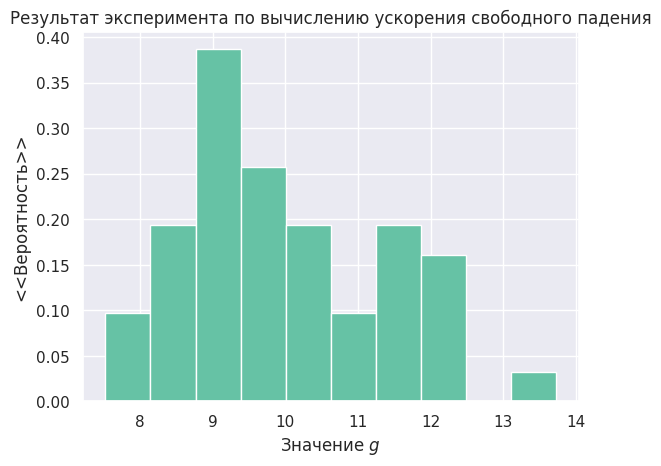

In [131]:
l = 0.5
g = 4 * np.power(np.pi, 2) * l / np.power(T_sample / 10, 2)
plt.hist(g, bins = 10, density = True)
plt.xlabel("Значение $g$")
plt.ylabel("<<Вероятность>>")
plt.title("Результат эксперимента по вычислению ускорения свободного падения");

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. Используйте критерий Вальда для проверки гипотезы $\mathsf{H}_0: a = 9.81$ vs $\mathsf{H}_1: a \neq 9.81$


In [132]:
wald_test_result = wald_test(sample = g, 
                             theta = 9.81, 
                             estimation_theta = np.mean(g), 
                             estimation_sigma = np.sqrt(np.mean(np.power(g, 2)) - np.power(np.mean(g), 2)))
pd.DataFrame(wald_test_result, index = [0]).round(2)

,p_value,left,right,statistic,critical_value,H0
0,0.47,9.56,10.34,0.72,1.96,True


**Вывод**

Как видим значение статистики $W$ оказалось меньше критического пареметра $C_{\alpha}$, а значит критерий $H_{0}$ не отвергается. 

Так как основная гипотеза не отвергается, то значение $p \ value$ оказалось больше ассимтотического уровня значимости $\alpha = 0.05$. При таком раскладе, значение $p \ value$ не несёт дополнительной информации об *<<уровне справедливости гипотезы>>*.

Построенный доверительный интервал очень широкий - бессмысленный для физических приложений. Видимо, $n = 50$ - маленький размер выборки для построения интервалов таким способом

**Профиль биология**

Испытывается эффективность препарата, понижающего температуру. Каждому пациенту измеряют температуру до и после приема препарата. В результате разность температур для испытуемых получилась равной: 


In [ ]:
a_sample = [1.19, 0.84, 1.3, 0.76, 0.99, 1.3, 0.97, 0.91, 0.97, 0.99, 1.18, 0.93, 0.84, 1.07, 0.95,
     1.01, 1.04, 0.84, 1.0, 1.19, 1.31, 0.97, 1.1, 0.86, 1.02, 0.95, 0.93, 0.84, 0.85, 0.78]

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. С помощью критерия Вальда проверьте гипотезу: $\mathsf{H}_0 \colon a=0$ vs. $\mathsf{H}_1 \colon a > 0$.

In [ ]:
<...>

**Вывод:**

Студенты **профиля химия** могут решать любую из задач.

--- 
### <b><i><font color="orange">Сложная часть</font></i></b> 


###  Задача 6
1. Пусть $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P} \in \mathcal{N}(a, \sigma^2)$. Постройте критерий для проверки гипотез $\mathsf{H}_0 \colon a = 0 $   vs.  $\mathsf{H}_1 \colon a > 0$ уровня значимости $\alpha$.

Бонусный сложный пункт: получите выражение для p-value аналогично правостороннему критерию Вальда

*Указание:*
- Используйте статистику $T(X) = \sqrt{n - 1} \frac{\overline{X}}{s}$, использовавшуюся при построении точных доверительных интервалов в нормальной модели. Какое распределение она имеет при справедливости $\mathsf{H}_0$ (т.е. при $a = 0$)? 
- Подумайте, какой вид должен иметь критерий? При каких значениях $T(X)$ гипотезу $\mathsf{H}_0$ разумно отвергать?
- Этот критерий реализован в `scipy.stats.ttest_1samp`. Использовать для данной задачи его можно следующим образом: `sps.ttest_1samp(sample, popmean=0, alternative='greater')`. В результате применения функция вернет значение статистики критерия, p-value и количество степеней свободы. Вы можете проверить свой ответ с ее помощью.

2. Пусть  $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P}$ с конечным вторым моментом. Постройте асимптотический критерий для проверки гипотез $\mathsf{H}_0 \colon EX_1 = 0 $   vs.  $\mathsf{H}_1 \colon  EX_1 > 0$ уровня значимости $\alpha$. Покажите, что при $n \to \infty$ этот критерий совпадает с критерием из первого пункта.

##### Пункт 1

Погуглив... выясним, что критерий носит название **t - Критерий**

В общем случае рассматривается статистика:
$$
T(X) = \sqrt{n - 1} \frac{\overline{X} - a}{S}
$$

В случае если $a$ действительно равно нулю, то статистика имеет **распределение Стьюдента с n-1 степенями свободы**(я не знаю как это доказывать). 

Теперь можно построить критерий так-же как мы это делали на лекции. Для двусторонней альтернативы множество критерий имеет вид:
$$
S = \left\{ |T(X)| > C_{\alpha} \right\}
$$

> Тут должен быть красивый график, по которому сразу ясно, что $C_{\alpha}$ есть $1 - \alpha / 2$ квантиль распределения Стьюдента с n-1 степенями свободы $\mu_{1 - \alpha / 2}$

Для правосторонней альтернативы множество-критерий имеет вид:

$$
S = \left\{ T(X) > C_{\alpha} \right\}
$$

Опять красивый график, по которому понятно, что $C_{\alpha} = \mu_{1 - \alpha}$

In [139]:
def student_test_right_alternative(sample: np.ndarray, alpha:float = 0.05):
    """_Критерий Стьюдента_

    Args:
        sample (np.ndarray): реализация выборки независимых, нормально распределённых случайных величин
        alpha (float): уровень значимости
    """
    n = len(sample)
    critical_value =  sps.t(df = n - 1).ppf(1 - alpha)
    statistics = np.sqrt(n - 1) * np.mean(sample) / np.var(sample)
    left = np.mean(sample) - critical_value * np.var(sample) / np.sqrt(n - 1)
    right = np.inf
    result = {
        "statistics": statistics,
        "critical_value": critical_value,
        "H0": statistics < critical_value,
        "left": left,
        "rigth": right
    }
    return result

Сгенерируем выборку размера $n = 200$ при различных значениях $a$, посмотрим что получится

In [143]:
sample_size = 200
a_values = [0, 1e-1, 1e-2, 0.4, 2, 30]

for a in a_values:
    for var in (np.random.rand(3) * 20).astype(np.int64):
        sample = sps.norm(loc = a, scale = var).rvs(size = sample_size)
        myResult = student_test_right_alternative(sample)
        scipyResult = sps.ttest_1samp(sample, popmean = 0, alternative = 'greater')
        scipyInterval = scipyResult.confidence_interval(confidence_level = 0.95)
        print(scipyInterval.low)
        print("-" * 30)
        print(f"Значение a: {a}")
        print(f"H0: {myResult['H0']}")
        print("Смогу ли я написать scipy: " + str(np.abs(myResult['statistics'] - scipyResult.statistic) > 1e-3))
        print("Смогу ли я написать scipy: " + str(np.abs(myResult['left'] - scipyInterval.low) > 1e-3))


-2.2604298757783594
------------------------------
Значение a: 0
H0: True
Смогу ли я написать scipy: True
Смогу ли я написать scipy: True
-1.7382150806474703
------------------------------
Значение a: 0
H0: True
Смогу ли я написать scipy: True
Смогу ли я написать scipy: True
-0.23076483143836146
------------------------------
Значение a: 0
H0: True
Смогу ли я написать scipy: True
Смогу ли я написать scipy: True
-1.8160905259334266
------------------------------
Значение a: 0.1
H0: True
Смогу ли я написать scipy: True
Смогу ли я написать scipy: True
0.16533511709935156
------------------------------
Значение a: 0.1
H0: True
Смогу ли я написать scipy: True
Смогу ли я написать scipy: True
-2.539782931832901
------------------------------
Значение a: 0.1
H0: True
Смогу ли я написать scipy: True
Смогу ли я написать scipy: True
-0.5363211412220988
------------------------------
Значение a: 0.01
H0: True
Смогу ли я написать scipy: True
Смогу ли я написать scipy: True
-0.7102614130876472
-----



### Задача 7

Это задание является продолжением задачи 6. Здесь вам необходимо наглядно сравнить два критерия из предыдущей задачи. Для этого прооделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

In [ ]:
...

**Вывод:**...

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [ ]:
...

**Вывод:**...

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

In [ ]:
...

**Вывод:**...

Сделайте общий вывод по сравнению двух критериев.

**Вывод:**